**Name:** Keval R Shah  
**SAP:** 60009220061  
**Batch :** D2-1  
**Lab:** ML Lab 5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
X = df.iloc[:, :-1]
y=df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
y_train_pred = clf.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [ ]:
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.965034965034965


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state=45)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)
y_pred = clf.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8811188811188811


In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
print(feature_imp)

mean_area          0.576519
mean_texture       0.186184
mean_smoothness    0.121417
mean_perimeter     0.078776
mean_radius        0.037103
dtype: float64


Text(0.5, 1.0, 'Feature Importances')

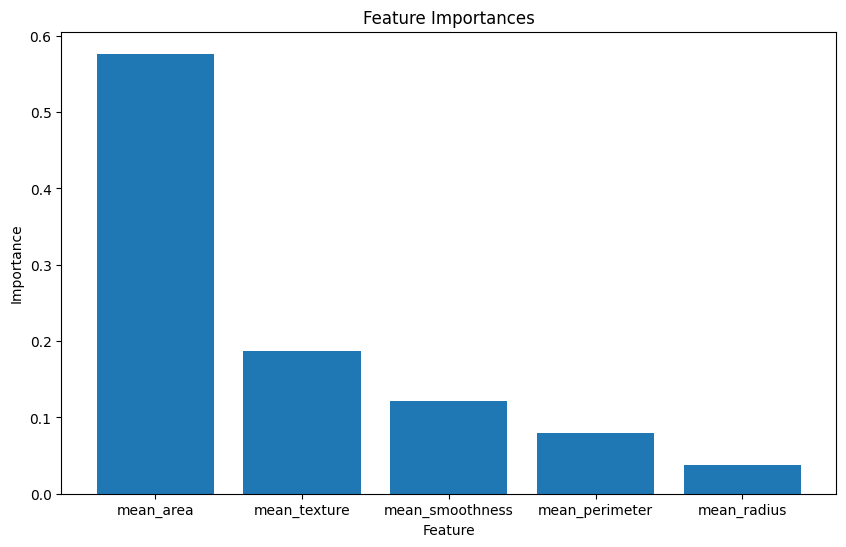

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_imp.index, feature_imp.values)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')

In [ ]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
X = df[['mean_area','mean_texture','mean_smoothness']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
y_train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.9649122807017544
